In [ ]:
from F1_library import libraryF1dataNotebook as libraryDataF1
import pandas as pd
import numpy as np
import fastf1 as ff1

from fastf1 import utils
from matplotlib import pyplot as plt

# FORMULA 1 HEINEKEN SILVER LAS VEGAS GRAND PRIX 2024
The Las Vegas Grand Prix is a motor racing event that forms part of the Formula One World Championship, taking place in Paradise, Nevada, in the United States. It is conducted as a night race on a temporary street circuit that includes parts of the Las Vegas Strip. The first race was held on November 18, 2023. Formula One and Las Vegas have signed an agreement until 2025 for the race
Source: Wikipedia

## Upgrades
In this section those upgrades brought by the teams will be shown.
<table>
<tr>
    <td>
    Team
    </td>
    <td>
    Updated component
    </td>
    <td>
    Upgrade type
    </td>
</tr>
<tr>
    <td>
    Red Bull Racing
    </td>
    <td>
    Front wing
    </td>
    <td>
    Circuit specific
    </td>
</tr>
<tr>
    <td>
    Red Bull Racing
    </td>
    <td>
    Front Fences
    </td>
    <td>
    Performance
    </td>
</tr>
<tr>
    <td>
    Mercedes
    </td>
    <td>
    Front Wing
    </td>
    <td>
    Circuit specific
    </td>
</tr>
<tr>
    <td>
    Ferrari
    </td>
    <td>
   Front wing
    </td>
    <td>
    Circuit specific
    </td>
</tr>
<tr>
    <td>
    Ferrari
    </td>
    <td>
   Floor fences
    </td>
    <td>
    Performance
    </td>
</tr>
<tr>
    <td>
    Ferrari
    </td>
    <td>
   Floor body
    </td>
    <td>
    Performance
    </td>
</tr>
<tr>
    <td>
    Ferrari
    </td>
    <td>
   Front edge
    </td>
    <td>
    Performance
    </td>
</tr>
<tr>
    <td>
    McLaren
    </td>
    <td>
    Front wing
    </td>
    <td>
    Circuit specific
    </td>
</tr>
<tr>
    <td>
    Aston Martin
    </td>
    <td>
    Front wing
    </td>
    <td>
    Circuit specific
    </td>
</tr>
<tr>
    <td>
    BWT Alpine F1 Team
    </td>
    <td>
    Front corner
    </td>
    <td>
    Performance
    </td>
</tr>
<tr>
    <td>
    Visa Cash App RB
    </td>
    <td>
    Coke/Engine Cover
    </td>
    <td>
    Performance
    </td>
</tr>
<tr>
    <td>
    Visa Cash App RB
    </td>
    <td>
    Rear suspension
    </td>
    <td>
    Other- Local flow aligment
    </td>
</tr>
<tr>
    <td>
    Visa Cash App RB
    </td>
    <td>
    Rear corner
    </td>
    <td>
    Performance
    </td>
</tr>
<tr>
    <td>
    Visa Cash App RB
    </td>
    <td>
    Mirror
    </td>
    <td>
    Circuit specific
    </td>
</tr>
<tr>
    <td>
    Kick Sauber
    </td>
    <td>
    Floor Body
    </td>
    <td>
    Performance
    </td>
</tr>
<tr>
    <td>
    Kick Sauber
    </td>
    <td>
    Floor fences
    </td>
    <td>
    Performance
    </td>
</tr>
<tr>
    <td>
    Kick Sauber
    </td>
    <td>
    Floor Edge
    </td>
    <td>
    Performance
    </td>
</tr>
<tr>
    <td>
    Kick Sauber
    </td>
    <td>
    Diffuser
    </td>
    <td>
    Performance
    </td>
</tr>
</table>

## Obtain session information

In [4]:
libraryDataF1.obtain_information('sessions',year=2024,country_acronym='USA').query("circuit_short_name== 'Las Vegas'")

,session_key,session_name,date_start,date_end,gmt_offset,session_type,meeting_key,location,country_key,country_code,country_name,circuit_key,circuit_short_name,year
10,9637,Practice 1,2024-11-22T02:30:00+00:00,2024-11-22T03:30:00+00:00,-08:00:00,Practice,1250,Las Vegas,19,USA,United States,152,Las Vegas,2024


## Free Practice 1
### Obtain setup

In [5]:
practice = libraryDataF1.obtain_information('laps',session_key=9637)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9637)
drivers = libraryDataF1.obtain_information('drivers',session_key=9637)

In [6]:
# drivers.loc[drivers['driver_number']==29,'team_name'] = 'McLaren'
# drivers.loc[drivers['driver_number']==12,'team_name'] = 'Mercedes'
# drivers.loc[drivers['driver_number']==34,'team_name'] = 'Aston Martin'
# drivers.loc[drivers['driver_number']==30,'team_name'] = 'RB'
# drivers.loc[drivers['driver_number']==38,'team_name'] = 'Ferrari'
# drivers.loc[drivers['driver_number']==43,'team_name'] = 'Williams'
# drivers.loc[drivers['driver_number']==97,'team_name'] = 'Kick Sauber'


In [7]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointables2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])
jointables2

,meeting_key,session_key,driver_number,i1_speed,i2_speed,st_speed,date_start,lap_duration,is_pit_out_lap,duration_sector_1,duration_sector_2,duration_sector_3,segments_sector_1,segments_sector_2,segments_sector_3,lap_number,compound,name_acronym,full_name,team_name
0,1250,9637,81,132.0,167,240,2024-11-22T02:30:05.152000+00:00,NaN,True,NaN,45.510,51.529,"[2064, 2064, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049]","[2048, 2049, 2049, 2048, 2049, 2048, 2048, 2064]",1,MEDIUM,PIA,Oscar PIASTRI,McLaren
1,1250,9637,24,133.0,181,173,2024-11-22T02:30:08.004000+00:00,NaN,True,NaN,46.654,47.705,"[2064, 2064, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 0]",1,MEDIUM,ZHO,ZHOU Guanyu,Kick Sauber
2,1250,9637,31,130.0,159,144,2024-11-22T02:30:11.071000+00:00,NaN,True,NaN,45.396,60.500,"[2064, 2064, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049]",1,MEDIUM,OCO,Esteban OCON,Alpine
3,1250,9637,10,138.0,168,251,2024-11-22T02:30:12.879000+00:00,NaN,True,NaN,43.001,57.367,"[2064, 2064, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049]",1,MEDIUM,GAS,Pierre GASLY,Alpine
4,1250,9637,22,146.0,181,140,2024-11-22T02:30:16.481000+00:00,NaN,True,NaN,44.273,49.815,"[2064, 2064, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2051, 2049, 2049, 2048, 2049, 2049]",1,MEDIUM,TSU,Yuki TSUNODA,RB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,1250,9637,10,153.0,194,192,2024-11-22T03:33:39.168000+00:00,142.790,False,52.823,36.277,53.690,"[None, 2048, 2048, 2048, 2048, 2048]","[2048, 2048, 2048, 2048, 2048, 2048, 2048]",[],24,SOFT,GAS,Pierre GASLY,Alpine
518,1250,9637,4,151.0,160,193,2024-11-22T03:33:40.947000+00:00,151.144,False,56.798,39.536,54.810,"[None, 2048, 2048, 2048, 2048, 2048]","[2048, 2048, 2048, 2048, 2048, 2048, 2048]",[],27,MEDIUM,NOR,Lando NORRIS,McLaren
519,1250,9637,16,125.0,171,241,2024-11-22T03:33:53.811000+00:00,144.764,False,54.441,41.541,48.782,"[None, 2048, 2048, 2048, 2048, 2048]","[2048, 2048, 2048, 2048, 2048, 2048, 2048]",[],27,MEDIUM,LEC,Charles LECLERC,Ferrari
520,1250,9637,23,134.0,191,212,2024-11-22T03:33:54.599000+00:00,140.470,False,50.718,41.124,48.628,"[None, 2048, 2048, 2048, 2048, 2048]","[2048, 2048, 2048, 2048, 2048, 2048, 2048]",[],26,SOFT,ALB,Alexander ALBON,Williams


### See race pace by means of the charts

### Medium tyres

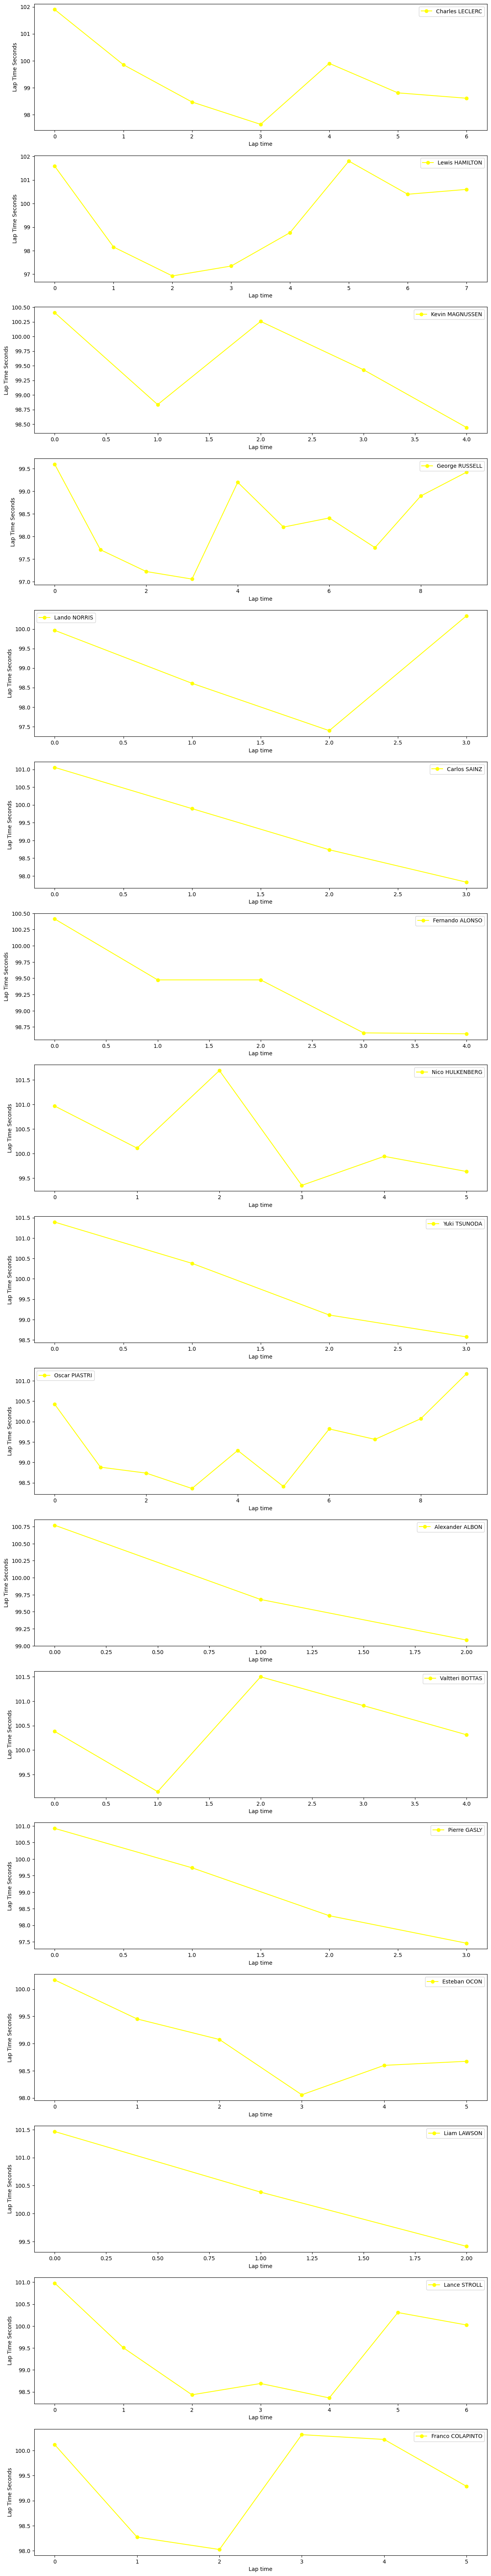

In [11]:
libraryDataF1.obtain_data_tyres(jointables2,"MEDIUM",102)

### Soft tyres

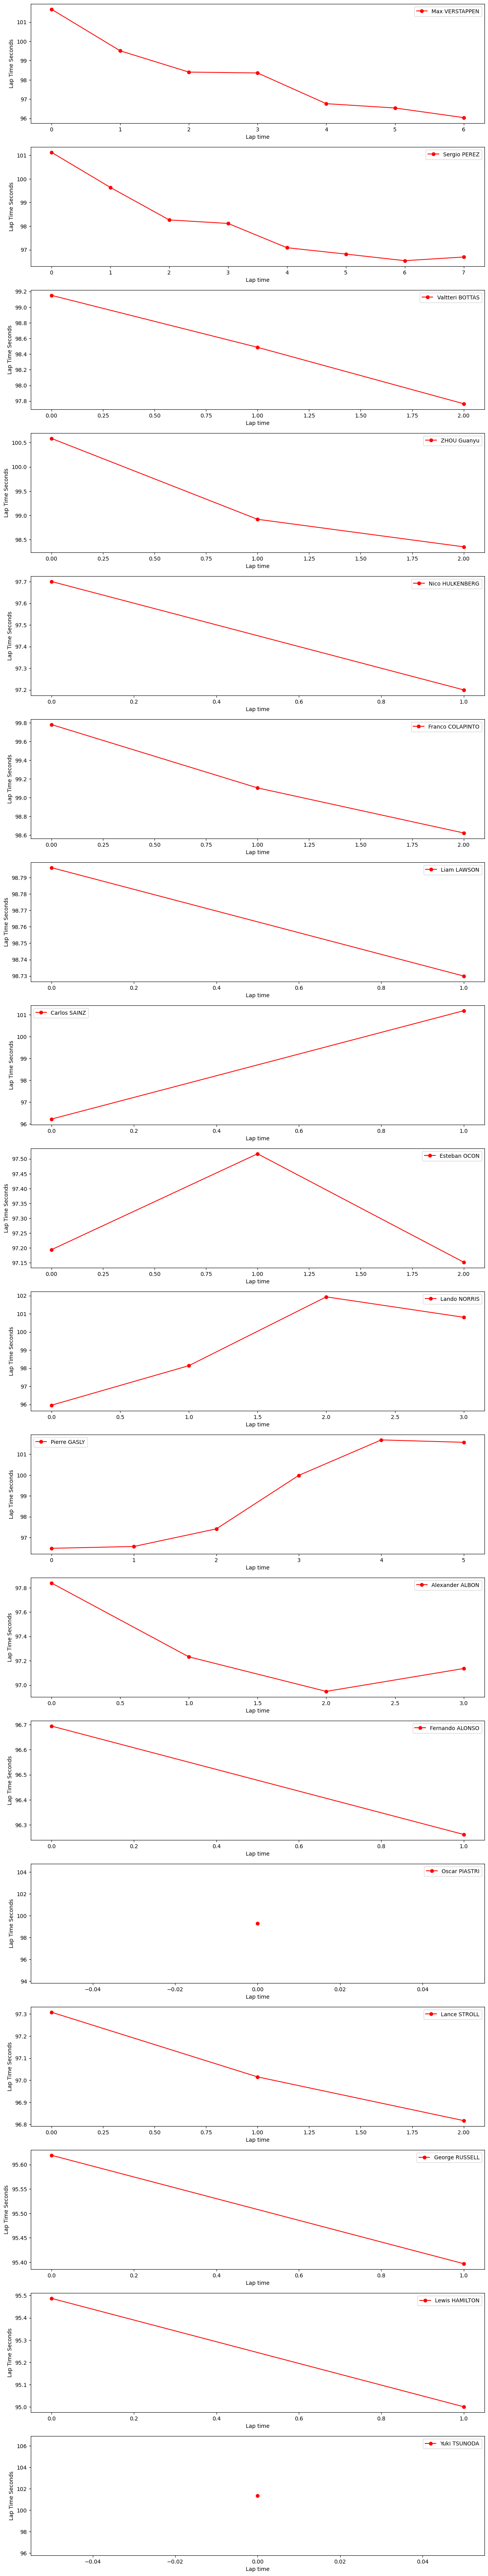

In [9]:
libraryDataF1.obtain_data_tyres(jointables2,"SOFT",102)

### Hard tyres

In [12]:
#libraryDataF1.obtain_data_tyres(jointables2,"HARD",102)

### Speed trap

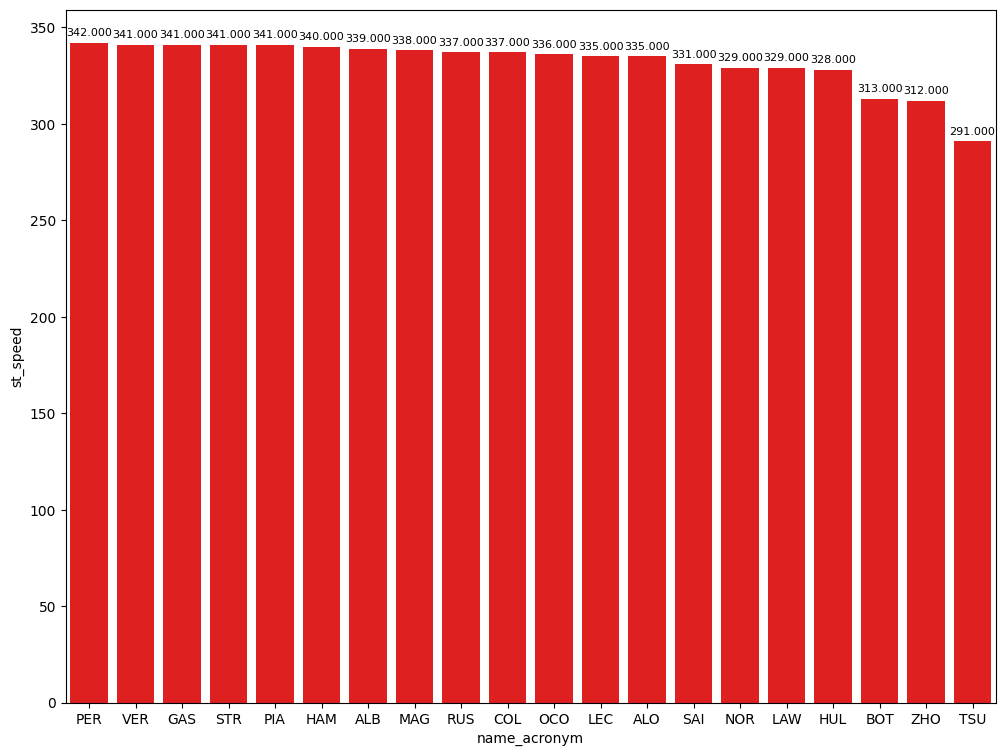

In [13]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

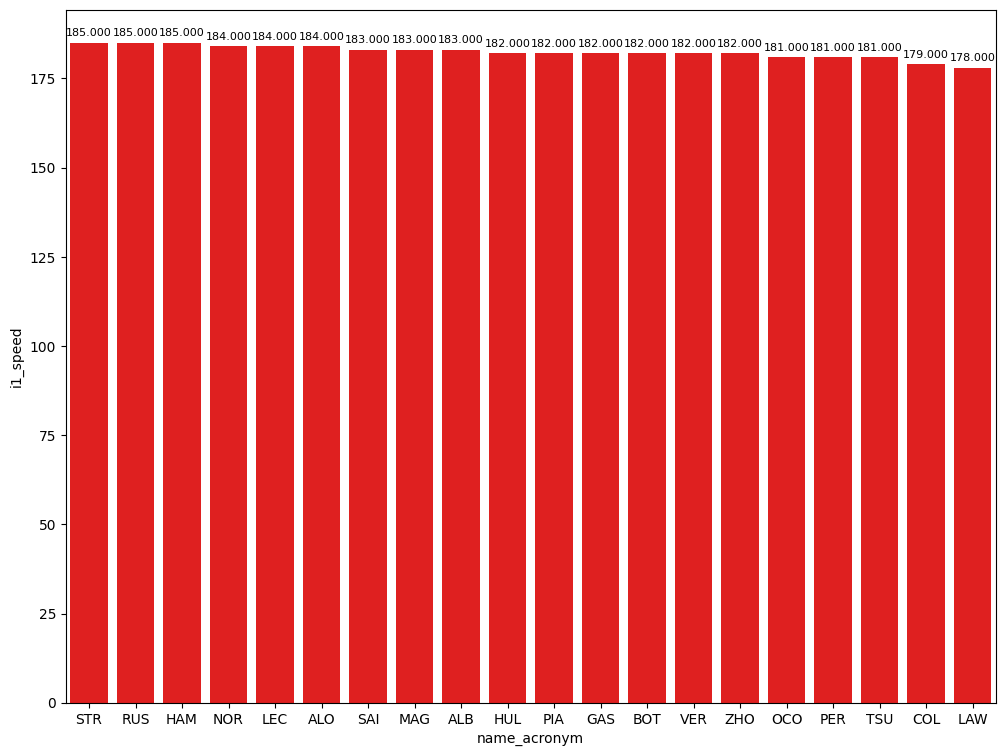

In [14]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

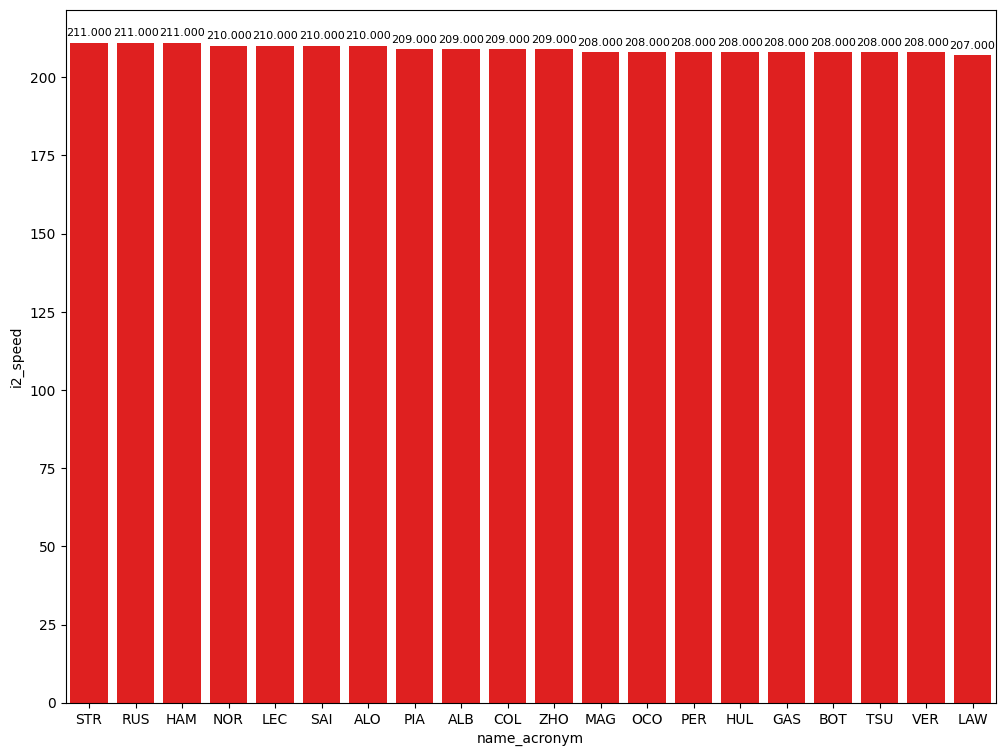

In [15]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Fastest lap per compound
In this section, I will show the best lap with the different compounds of the session. 

In [16]:
compoundsPace = jointables2.loc[jointables2.groupby(['compound'])['lap_duration'].idxmin()]
compoundsPace[['full_name','compound','duration_sector_1','duration_sector_2','duration_sector_3','lap_duration']]

,full_name,compound,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
141,Lewis HAMILTON,MEDIUM,27.358,32.549,37.020,96.927
475,Lewis HAMILTON,SOFT,26.784,31.811,36.406,95.001
336,Charles LECLERC,UNKNOWN,26.998,31.884,37.125,96.007


### Deltas
In this section we can see the deltas of the fastest lap of each driver compared with the fastest lap of the session.

In [17]:
practiceCleaned = jointables2.query("lap_duration >1")
drivers_list = list(practiceCleaned['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_fastest_lap(driver,practiceCleaned,newdataset)

arr= libraryDataF1.obtain_deltas(newdataset)
newdataset.insert(3,'delta',arr)


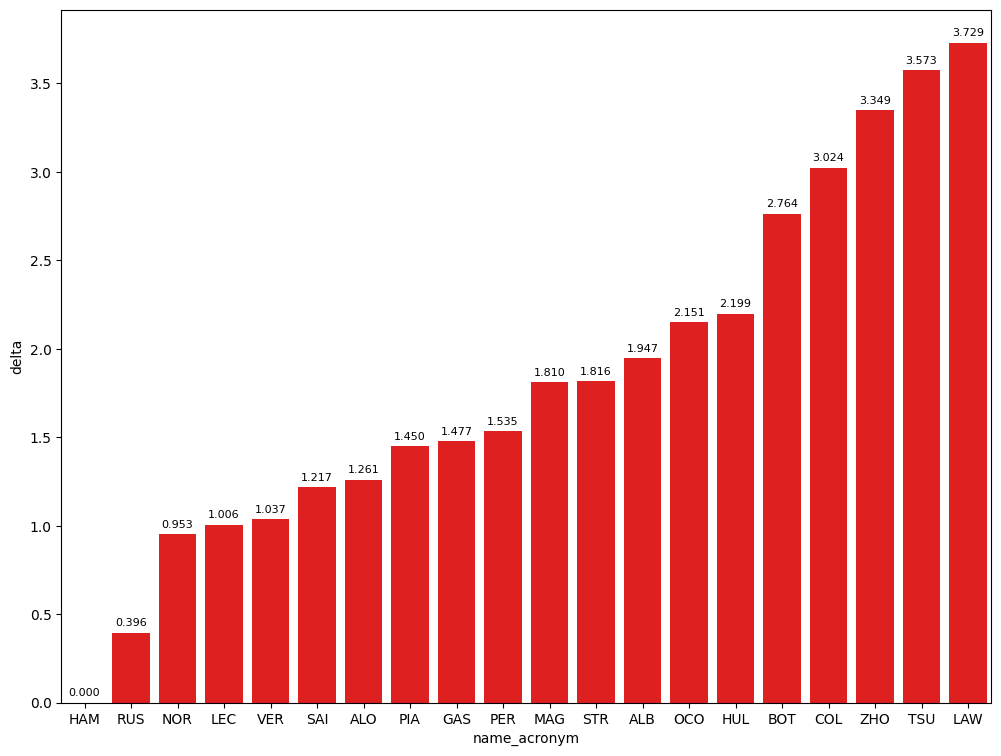

In [18]:
dt = newdataset.sort_values(ascending=True,by='delta')
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Track dominance
In this section, best sector are taken of each sector to see the car's performance in each sector. Also, each sector will be commented. As we can see in the free practice, these data  are not very representative due to the changing conditions.


In [19]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_1'].idxmin().dropna()].sort_values(by=['duration_sector_1'],ascending=True)
sectorPace[['duration_sector_1','full_name','compound','lap_duration','lap_number']]

,duration_sector_1,full_name,compound,lap_duration,lap_number
475,26.784,Lewis HAMILTON,SOFT,95.001,24
440,26.911,George RUSSELL,SOFT,95.397,26
375,26.917,Carlos SAINZ,SOFT,101.189,21
450,26.964,Max VERSTAPPEN,SOFT,96.038,22
336,26.998,Charles LECLERC,UNKNOWN,96.007,19
322,27.048,Oscar PIASTRI,UNKNOWN,96.451,14
431,27.063,Sergio PEREZ,SOFT,96.536,21
424,27.101,Fernando ALONSO,SOFT,96.262,21
377,27.102,Lando NORRIS,SOFT,98.137,19
273,27.224,Kevin MAGNUSSEN,UNKNOWN,97.892,13


In [20]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_2'].idxmin()].sort_values(by=['duration_sector_2'],ascending=True)
sectorPace[['duration_sector_2','full_name','compound','lap_duration','lap_number']]

,duration_sector_2,full_name,compound,lap_duration,lap_number
475,31.811,Lewis HAMILTON,SOFT,95.001,24
336,31.884,Charles LECLERC,UNKNOWN,96.007,19
404,31.926,George RUSSELL,SOFT,95.619,24
450,31.992,Max VERSTAPPEN,SOFT,96.038,22
310,32.012,Carlos SAINZ,SOFT,96.218,17
338,32.104,Lando NORRIS,SOFT,95.954,16
378,32.209,Pierre GASLY,SOFT,96.566,16
476,32.213,Lance STROLL,SOFT,96.817,23
424,32.279,Fernando ALONSO,SOFT,96.262,21
471,32.281,Sergio PEREZ,SOFT,96.691,23


In [21]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_3'].idxmin()].sort_values(by=['duration_sector_3'],ascending=True)
sectorPace[['duration_sector_3','full_name','compound','lap_duration','lap_number']]

,duration_sector_3,full_name,compound,lap_duration,lap_number
440,36.395,George RUSSELL,SOFT,95.397,26
475,36.406,Lewis HAMILTON,SOFT,95.001,24
338,36.709,Lando NORRIS,SOFT,95.954,16
351,36.861,Pierre GASLY,SOFT,96.478,14
424,36.882,Fernando ALONSO,SOFT,96.262,21
322,37.059,Oscar PIASTRI,UNKNOWN,96.451,14
450,37.082,Max VERSTAPPEN,SOFT,96.038,22
329,37.099,Esteban OCON,SOFT,97.194,14
420,37.111,Alexander ALBON,SOFT,96.948,21
431,37.124,Sergio PEREZ,SOFT,96.536,21


### Mean pace with the different compound used on the session

In [24]:
race_pace = pd.DataFrame(jointables2.query("is_pit_out_lap == False and lap_duration > 99 and lap_duration <=103").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

,lap_duration
compound,
UNKNOWN,100.247000
MEDIUM,100.661432
SOFT,100.865526


### Long runs

In [25]:
MINIMUN_SECONDS = 99
MAXIMUM_SECONDS = 103

#### Red Bull Racing

In [26]:
stintInformation.query('driver_number == 1 or driver_number == 11')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
16,1250,9637,1,1,1,15,SOFT,0
17,1250,9637,1,11,1,15,SOFT,0
49,1250,9637,2,1,16,26,SOFT,0
50,1250,9637,2,11,16,26,SOFT,0


In [27]:
libraryDataF1.getinfolongruns(jointables2,1,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
65,Max VERSTAPPEN,SOFT,2024-11-22T02:37:26.823000+00:00,4,29.086,34.056,38.524,101.666
103,Max VERSTAPPEN,SOFT,2024-11-22T02:41:21.417000+00:00,6,28.061,33.444,38.002,99.507


In [28]:
libraryDataF1.getinfolongruns(jointables2,11,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
79,Sergio PEREZ,SOFT,2024-11-22T02:38:59.361000+00:00,5,29.229,34.644,38.531,102.404
119,Sergio PEREZ,SOFT,2024-11-22T02:42:41.362000+00:00,7,29.340,33.805,37.983,101.128
157,Sergio PEREZ,SOFT,2024-11-22T02:46:23.065000+00:00,9,28.221,33.363,38.056,99.640


#### Ferrari

In [61]:
stintInformation.query('driver_number == 16 or driver_number == 55')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
12,1250,9637,1,16,1,13,MEDIUM,0
18,1250,9637,1,55,1,15,MEDIUM,0
41,1250,9637,2,16,14,14,UNKNOWN,0
42,1250,9637,3,16,14,22,UNKNOWN,0
47,1250,9637,2,55,16,22,SOFT,0
66,1250,9637,3,55,23,27,UNKNOWN,0
67,1250,9637,4,16,23,28,MEDIUM,0


In [62]:
libraryDataF1.getinfolongruns(jointables2,16,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
54,Charles LECLERC,MEDIUM,2024-11-22T02:36:31.704000+00:00,4,29.284,34.007,38.609,101.900
90,Charles LECLERC,MEDIUM,2024-11-22T02:40:05.784000+00:00,6,28.553,33.284,38.018,99.855
128,Charles LECLERC,MEDIUM,2024-11-22T02:43:37.323000+00:00,8,28.105,32.841,41.263,102.209
442,Charles LECLERC,MEDIUM,2024-11-22T03:26:34.509000+00:00,23,28.445,33.369,38.090,99.904


In [31]:
libraryDataF1.getinfolongruns(jointables2,55,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
95,Carlos SAINZ,MEDIUM,2024-11-22T02:40:31.642000+00:00,6,28.734,33.966,38.357,101.057
135,Carlos SAINZ,MEDIUM,2024-11-22T02:44:18.261000+00:00,8,28.161,33.262,38.472,99.895
375,Carlos SAINZ,SOFT,2024-11-22T03:19:01.980000+00:00,21,26.917,32.239,42.033,101.189
444,Carlos SAINZ,UNKNOWN,2024-11-22T03:26:41.914000+00:00,23,28.286,33.652,38.309,100.247


#### Mercedes

In [63]:
stintInformation.query('driver_number == 44 or driver_number == 63')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
14,1250,9637,1,44,1,14,MEDIUM,0
15,1250,9637,1,63,1,14,MEDIUM,0
45,1250,9637,2,44,15,21,MEDIUM,0
46,1250,9637,2,63,15,22,MEDIUM,0
65,1250,9637,3,44,22,27,SOFT,0
68,1250,9637,3,63,23,30,SOFT,0


In [64]:
libraryDataF1.getinfolongruns(jointables2,44,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
48,Lewis HAMILTON,MEDIUM,2024-11-22T02:35:48.504000+00:00,3,30.053,34.241,38.527,102.821
66,Lewis HAMILTON,MEDIUM,2024-11-22T02:37:31.307000+00:00,4,28.596,33.591,39.398,101.585
304,Lewis HAMILTON,MEDIUM,2024-11-22T03:09:59.952000+00:00,17,28.893,34.454,38.453,101.800
317,Lewis HAMILTON,MEDIUM,2024-11-22T03:11:41.674000+00:00,18,28.585,33.803,38.005,100.393
332,Lewis HAMILTON,MEDIUM,2024-11-22T03:13:22.061000+00:00,19,28.303,34.178,38.118,100.599


In [34]:
libraryDataF1.getinfolongruns(jointables2,63,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
47,George RUSSELL,MEDIUM,2024-11-22T02:35:32.599000+00:00,3,29.411,35.241,37.938,102.590
83,George RUSSELL,MEDIUM,2024-11-22T02:39:18.480000+00:00,5,28.538,33.682,37.375,99.595
279,George RUSSELL,MEDIUM,2024-11-22T03:06:55.813000+00:00,15,28.398,33.262,37.537,99.197
349,George RUSSELL,MEDIUM,2024-11-22T03:15:08.188000+00:00,20,28.167,33.747,37.506,99.420


#### McLaren

In [65]:
stintInformation.query('driver_number == 81 or driver_number == 4')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
2,1250,9637,1,81,1,2,MEDIUM,0
7,1250,9637,1,4,1,10,MEDIUM,0
20,1250,9637,2,81,3,3,MEDIUM,0
23,1250,9637,3,81,4,11,MEDIUM,0
31,1250,9637,2,4,11,15,MEDIUM,0
35,1250,9637,4,81,12,12,UNKNOWN,0
36,1250,9637,5,81,12,18,UNKNOWN,0
48,1250,9637,3,4,16,23,SOFT,0
57,1250,9637,6,81,19,19,SOFT,0
60,1250,9637,7,81,19,27,MEDIUM,0


In [66]:
libraryDataF1.getinfolongruns(jointables2,4,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
91,Lando NORRIS,MEDIUM,2024-11-22T02:40:10.468000+00:00,6,28.395,33.648,37.923,99.966
367,Lando NORRIS,SOFT,2024-11-22T03:17:27.570000+00:00,18,27.413,32.224,43.183,102.820
388,Lando NORRIS,SOFT,2024-11-22T03:20:48.521000+00:00,20,28.388,33.285,40.262,101.935
403,Lando NORRIS,SOFT,2024-11-22T03:22:30.498000+00:00,21,28.369,33.632,38.807,100.808
459,Lando NORRIS,MEDIUM,2024-11-22T03:28:01.677000+00:00,24,28.334,34.247,37.757,100.338


In [37]:
libraryDataF1.getinfolongruns(jointables2,81,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
105,Oscar PIASTRI,MEDIUM,2024-11-22T02:41:31.531000+00:00,4,29.981,34.709,38.256,102.946
125,Oscar PIASTRI,MEDIUM,2024-11-22T02:43:14.400000+00:00,5,28.661,34.032,37.730,100.423
394,Oscar PIASTRI,SOFT,2024-11-22T03:21:38.815000+00:00,19,27.852,33.991,37.449,99.292
395,Oscar PIASTRI,MEDIUM,2024-11-22T03:21:38.815000+00:00,19,27.852,33.991,37.449,99.292
425,Oscar PIASTRI,MEDIUM,2024-11-22T03:24:56.577000+00:00,21,28.466,33.874,37.479,99.819
443,Oscar PIASTRI,MEDIUM,2024-11-22T03:26:36.263000+00:00,22,28.387,33.754,37.422,99.563
462,Oscar PIASTRI,MEDIUM,2024-11-22T03:28:15.793000+00:00,23,28.830,33.752,37.487,100.069
481,Oscar PIASTRI,MEDIUM,2024-11-22T03:29:55.915000+00:00,24,28.294,35.365,37.513,101.172


#### Aston Martin

In [68]:
stintInformation.query('driver_number == 18 or driver_number == 14')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
3,1250,9637,1,18,1,7,MEDIUM,0
5,1250,9637,1,14,1,8,MEDIUM,0
25,1250,9637,2,14,8,17,MEDIUM,6
26,1250,9637,2,18,8,18,MEDIUM,6
55,1250,9637,3,14,18,26,SOFT,0
56,1250,9637,3,18,18,26,SOFT,0


In [69]:
libraryDataF1.getinfolongruns(jointables2,14,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
97,Fernando ALONSO,MEDIUM,2024-11-22T02:40:38.854000+00:00,5,28.532,33.779,38.102,100.413
200,Fernando ALONSO,MEDIUM,2024-11-22T02:52:49.040000+00:00,8,28.155,33.618,37.702,99.475
201,Fernando ALONSO,MEDIUM,2024-11-22T02:52:49.040000+00:00,8,28.155,33.618,37.702,99.475
263,Fernando ALONSO,MEDIUM,2024-11-22T03:05:03.485000+00:00,15,29.427,34.893,38.515,102.835


In [40]:
libraryDataF1.getinfolongruns(jointables2,18,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
218,Lance STROLL,MEDIUM,2024-11-22T02:56:03.239000+00:00,8,29.393,33.522,38.065,100.980
225,Lance STROLL,MEDIUM,2024-11-22T02:57:44.168000+00:00,9,28.731,33.121,37.654,99.506
271,Lance STROLL,MEDIUM,2024-11-22T03:06:07.259000+00:00,14,28.855,33.371,38.083,100.309
285,Lance STROLL,MEDIUM,2024-11-22T03:07:47.612000+00:00,15,28.635,33.325,38.065,100.025


#### RB

In [41]:
stintInformation.query('driver_number == 30 or driver_number == 22')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
13,1250,9637,1,22,1,14,MEDIUM,0
19,1250,9637,1,30,1,16,MEDIUM,0
43,1250,9637,2,22,15,15,UNKNOWN,0
44,1250,9637,3,22,15,20,MEDIUM,0
52,1250,9637,2,30,17,23,SOFT,0
61,1250,9637,4,22,21,24,SOFT,0
70,1250,9637,3,30,24,29,MEDIUM,0


In [42]:
libraryDataF1.getinfolongruns(jointables2,30,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
134,Liam LAWSON,MEDIUM,2024-11-22T02:44:08.609000+00:00,8,29.041,34.695,38.778,102.514
165,Liam LAWSON,MEDIUM,2024-11-22T02:47:52.766000+00:00,10,29.199,33.850,38.417,101.466
192,Liam LAWSON,MEDIUM,2024-11-22T02:51:39.221000+00:00,12,28.719,33.705,37.958,100.382
216,Liam LAWSON,MEDIUM,2024-11-22T02:55:22.191000+00:00,14,28.378,33.092,37.942,99.412
427,Liam LAWSON,MEDIUM,2024-11-22T03:25:00.691000+00:00,24,29.501,34.237,39.005,102.743
446,Liam LAWSON,MEDIUM,2024-11-22T03:26:43.411000+00:00,25,29.665,34.577,38.544,102.786
465,Liam LAWSON,MEDIUM,2024-11-22T03:28:26.298000+00:00,26,29.432,34.381,38.541,102.354


In [43]:
libraryDataF1.getinfolongruns(jointables2,22,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
111,Yuki TSUNODA,MEDIUM,2024-11-22T02:42:00.755000+00:00,7,29.601,33.728,38.063,101.392
168,Yuki TSUNODA,MEDIUM,2024-11-22T02:48:05.505000+00:00,10,28.984,33.339,38.057,100.380
195,Yuki TSUNODA,MEDIUM,2024-11-22T02:51:55.021000+00:00,12,28.213,32.972,37.927,99.112
474,Yuki TSUNODA,SOFT,2024-11-22T03:29:21.411000+00:00,21,29.327,33.629,38.403,101.359


#### Haas

In [44]:
stintInformation.query('driver_number == 20 or driver_number == 27')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
4,1250,9637,1,20,1,7,MEDIUM,0
9,1250,9637,1,27,1,10,MEDIUM,0
24,1250,9637,2,20,7,10,MEDIUM,0
27,1250,9637,3,20,10,10,UNKNOWN,0
28,1250,9637,2,27,10,10,MEDIUM,8
33,1250,9637,3,27,11,17,SOFT,0
34,1250,9637,4,20,11,18,UNKNOWN,0
53,1250,9637,4,27,18,18,UNKNOWN,0
54,1250,9637,5,27,18,25,MEDIUM,0
59,1250,9637,5,20,19,25,MEDIUM,0


In [45]:
libraryDataF1.getinfolongruns(jointables2,20,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
36,Kevin MAGNUSSEN,MEDIUM,2024-11-22T02:34:28.526000+00:00,3,29.577,34.337,38.731,102.645
71,Kevin MAGNUSSEN,MEDIUM,2024-11-22T02:38:09.435000+00:00,5,28.957,33.354,38.096,100.407
412,Kevin MAGNUSSEN,MEDIUM,2024-11-22T03:23:35.803000+00:00,19,28.718,33.512,38.028,100.258
430,Kevin MAGNUSSEN,MEDIUM,2024-11-22T03:25:15.989000+00:00,20,28.341,33.198,37.891,99.430
467,Kevin MAGNUSSEN,MEDIUM,2024-11-22T03:28:33.832000+00:00,22,28.417,36.041,37.900,102.358


In [46]:
libraryDataF1.getinfolongruns(jointables2,27,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
100,Nico HULKENBERG,MEDIUM,2024-11-22T02:40:52.047000+00:00,5,28.565,34.339,38.062,100.966
138,Nico HULKENBERG,MEDIUM,2024-11-22T02:44:30.556000+00:00,7,28.529,33.835,37.746,100.110
416,Nico HULKENBERG,MEDIUM,2024-11-22T03:23:55.444000+00:00,19,28.962,34.792,37.934,101.688
432,Nico HULKENBERG,MEDIUM,2024-11-22T03:25:37.217000+00:00,20,28.273,33.233,37.847,99.353
451,Nico HULKENBERG,MEDIUM,2024-11-22T03:27:16.477000+00:00,21,28.226,33.868,37.849,99.943
470,Nico HULKENBERG,MEDIUM,2024-11-22T03:28:56.373000+00:00,22,28.371,33.483,37.781,99.635


#### Alpine

In [47]:
stintInformation.query('driver_number == 31 or driver_number == 10')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
0,1250,9637,1,10,1,2,MEDIUM,0
1,1250,9637,1,31,1,2,MEDIUM,0
21,1250,9637,2,10,3,12,MEDIUM,1
22,1250,9637,2,31,3,12,MEDIUM,1
39,1250,9637,3,31,13,20,SOFT,0
40,1250,9637,3,10,13,25,SOFT,0
62,1250,9637,4,31,21,26,MEDIUM,0


In [48]:
libraryDataF1.getinfolongruns(jointables2,31,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
149,Esteban OCON,MEDIUM,2024-11-22T02:45:50.166000+00:00,5,28.615,33.477,38.078,100.170
164,Esteban OCON,MEDIUM,2024-11-22T02:47:30.373000+00:00,6,28.184,33.425,37.844,99.453
188,Esteban OCON,MEDIUM,2024-11-22T02:51:01.137000+00:00,8,28.131,33.176,37.768,99.075


In [49]:
libraryDataF1.getinfolongruns(jointables2,10,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
136,Pierre GASLY,MEDIUM,2024-11-22T02:44:19.199000+00:00,4,29.050,34.033,37.843,100.926
169,Pierre GASLY,MEDIUM,2024-11-22T02:48:09.230000+00:00,6,28.984,33.330,37.422,99.736
421,Pierre GASLY,SOFT,2024-11-22T03:24:38.193000+00:00,19,28.142,33.602,38.239,99.983
438,Pierre GASLY,SOFT,2024-11-22T03:26:18.300000+00:00,20,28.923,34.495,38.268,101.686
457,Pierre GASLY,SOFT,2024-11-22T03:27:59.863000+00:00,21,28.983,34.319,38.269,101.571
477,Pierre GASLY,SOFT,2024-11-22T03:29:41.465000+00:00,22,28.616,34.767,39.451,102.834


#### Williams

In [50]:
stintInformation.query('driver_number == 43 or driver_number == 23')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
8,1250,9637,1,23,1,10,MEDIUM,0
10,1250,9637,1,43,1,10,MEDIUM,0
30,1250,9637,2,43,11,11,MEDIUM,9
32,1250,9637,2,23,11,15,MEDIUM,0
37,1250,9637,3,43,12,20,SOFT,0
51,1250,9637,3,23,16,27,SOFT,0
64,1250,9637,4,43,21,29,MEDIUM,0


In [51]:
libraryDataF1.getinfolongruns(jointables2,23,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
126,Alexander ALBON,MEDIUM,2024-11-22T02:43:19.961000+00:00,6,28.690,33.845,38.235,100.770
162,Alexander ALBON,MEDIUM,2024-11-22T02:47:08.215000+00:00,8,28.638,34.196,39.537,102.371
272,Alexander ALBON,MEDIUM,2024-11-22T03:06:18.313000+00:00,11,29.277,34.522,38.619,102.418
287,Alexander ALBON,MEDIUM,2024-11-22T03:08:00.728000+00:00,12,28.184,33.591,37.905,99.680
302,Alexander ALBON,MEDIUM,2024-11-22T03:09:40.373000+00:00,13,28.052,33.337,37.695,99.084


In [52]:
libraryDataF1.getinfolongruns(jointables2,43,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
132,Franco COLAPINTO,MEDIUM,2024-11-22T02:43:57.151000+00:00,8,29.526,34.483,38.299,102.308
262,Franco COLAPINTO,SOFT,2024-11-22T03:04:58.293000+00:00,13,28.434,33.362,37.985,99.781
294,Franco COLAPINTO,SOFT,2024-11-22T03:08:41.468000+00:00,15,27.921,33.344,37.840,99.105
383,Franco COLAPINTO,MEDIUM,2024-11-22T03:20:05.714000+00:00,21,28.617,33.465,38.033,100.115
428,Franco COLAPINTO,MEDIUM,2024-11-22T03:25:02.015000+00:00,24,28.541,34.214,37.559,100.314
445,Franco COLAPINTO,MEDIUM,2024-11-22T03:26:42.535000+00:00,25,28.972,33.417,37.830,100.219
464,Franco COLAPINTO,MEDIUM,2024-11-22T03:28:22.815000+00:00,26,28.294,33.277,37.713,99.284


#### Kick Sauber

In [70]:
stintInformation.query('driver_number == 24 or driver_number == 77')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
6,1250,9637,1,24,1,9,MEDIUM,0
11,1250,9637,1,77,1,12,MEDIUM,0
29,1250,9637,2,24,10,18,SOFT,0
38,1250,9637,2,77,12,20,SOFT,0
58,1250,9637,3,24,19,24,SOFT,0
63,1250,9637,3,77,21,26,MEDIUM,0


In [71]:
libraryDataF1.getinfolongruns(jointables2,24,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
248,ZHOU Guanyu,SOFT,2024-11-22T03:02:55.056000+00:00,11,28.566,33.619,38.402,100.587


In [55]:
libraryDataF1.getinfolongruns(jointables2,77,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
89,Valtteri BOTTAS,MEDIUM,2024-11-22T02:39:57.305000+00:00,6,28.897,34.964,38.151,102.012
129,Valtteri BOTTAS,MEDIUM,2024-11-22T02:43:41.623000+00:00,8,28.650,33.899,37.833,100.382
241,Valtteri BOTTAS,MEDIUM,2024-11-22T03:01:57.908000+00:00,12,28.028,33.278,37.844,99.150
242,Valtteri BOTTAS,SOFT,2024-11-22T03:01:57.908000+00:00,12,28.028,33.278,37.844,99.150
435,Valtteri BOTTAS,MEDIUM,2024-11-22T03:25:50.865000+00:00,21,29.149,34.017,38.332,101.498
454,Valtteri BOTTAS,MEDIUM,2024-11-22T03:27:32.405000+00:00,22,28.869,33.634,38.405,100.908
473,Valtteri BOTTAS,MEDIUM,2024-11-22T03:29:13.293000+00:00,23,28.704,33.603,38.006,100.313


#### Long runs mean for each driver

In [72]:
longrun_data = libraryDataF1.obtainLongRunData(drivers,jointables2,MINIMUN_SECONDS,MAXIMUM_SECONDS)

##### Sorted by lap duration

In [73]:
pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3']).sort_values(by='lap_duration',ascending=True)

,driver,compound,lap_duration,sector1,sector2,sector3
13,Esteban OCON,MEDIUM,99.566000,28.310000,33.359333,37.896667
14,Franco COLAPINTO,MEDIUM,100.160857,28.615000,33.651714,37.894143
17,George RUSSELL,MEDIUM,100.200500,28.628500,33.983000,37.589000
6,Lance STROLL,MEDIUM,100.205000,28.903500,33.334750,37.966750
11,Nico HULKENBERG,MEDIUM,100.282500,28.487667,33.925000,37.869833
19,Oscar PIASTRI,MEDIUM,100.322000,28.540375,34.183500,37.598125
18,Valtteri BOTTAS,MEDIUM,100.487571,28.617857,33.810429,38.059286
4,Fernando ALONSO,MEDIUM,100.549500,28.567250,33.977000,38.005250
8,Yuki TSUNODA,MEDIUM,100.560750,29.031250,33.417000,38.112500
0,Max VERSTAPPEN,SOFT,100.586500,28.573500,33.750000,38.263000


##### Sorted by sector 1


In [74]:
pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3']).sort_values(by='sector1',ascending=True)

,driver,compound,lap_duration,sector1,sector2,sector3
16,Carlos SAINZ,MEDIUM,100.597000,28.024500,33.279750,39.292750
1,Lando NORRIS,SOFT,101.173400,28.179800,33.407200,39.586400
13,Esteban OCON,MEDIUM,99.566000,28.310000,33.359333,37.896667
11,Nico HULKENBERG,MEDIUM,100.282500,28.487667,33.925000,37.869833
19,Oscar PIASTRI,MEDIUM,100.322000,28.540375,34.183500,37.598125
10,ZHOU Guanyu,SOFT,100.587000,28.566000,33.619000,38.402000
4,Fernando ALONSO,MEDIUM,100.549500,28.567250,33.977000,38.005250
9,Alexander ALBON,MEDIUM,100.864600,28.568200,33.898200,38.398200
0,Max VERSTAPPEN,SOFT,100.586500,28.573500,33.750000,38.263000
5,Charles LECLERC,MEDIUM,100.967000,28.596750,33.375250,38.995000


##### Sorted by sector 2


In [75]:
pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3']).sort_values(by='sector2',ascending=True)

,driver,compound,lap_duration,sector1,sector2,sector3
16,Carlos SAINZ,MEDIUM,100.597000,28.024500,33.279750,39.292750
6,Lance STROLL,MEDIUM,100.205000,28.903500,33.334750,37.966750
13,Esteban OCON,MEDIUM,99.566000,28.310000,33.359333,37.896667
5,Charles LECLERC,MEDIUM,100.967000,28.596750,33.375250,38.995000
1,Lando NORRIS,SOFT,101.173400,28.179800,33.407200,39.586400
8,Yuki TSUNODA,MEDIUM,100.560750,29.031250,33.417000,38.112500
10,ZHOU Guanyu,SOFT,100.587000,28.566000,33.619000,38.402000
14,Franco COLAPINTO,MEDIUM,100.160857,28.615000,33.651714,37.894143
0,Max VERSTAPPEN,SOFT,100.586500,28.573500,33.750000,38.263000
18,Valtteri BOTTAS,MEDIUM,100.487571,28.617857,33.810429,38.059286


##### Sorted by sector 3

In [76]:
pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3']).sort_values(by='sector3',ascending=True)

,driver,compound,lap_duration,sector1,sector2,sector3
17,George RUSSELL,MEDIUM,100.200500,28.628500,33.983000,37.589000
19,Oscar PIASTRI,MEDIUM,100.322000,28.540375,34.183500,37.598125
11,Nico HULKENBERG,MEDIUM,100.282500,28.487667,33.925000,37.869833
14,Franco COLAPINTO,MEDIUM,100.160857,28.615000,33.651714,37.894143
13,Esteban OCON,MEDIUM,99.566000,28.310000,33.359333,37.896667
6,Lance STROLL,MEDIUM,100.205000,28.903500,33.334750,37.966750
4,Fernando ALONSO,MEDIUM,100.549500,28.567250,33.977000,38.005250
18,Valtteri BOTTAS,MEDIUM,100.487571,28.617857,33.810429,38.059286
8,Yuki TSUNODA,MEDIUM,100.560750,29.031250,33.417000,38.112500
7,Kevin MAGNUSSEN,MEDIUM,101.019600,28.802000,34.088400,38.129200


## Free Practice 2
### Obtain setup

In [ ]:
practice = libraryDataF1.obtain_information('laps',session_key=9619)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9619)
drivers = libraryDataF1.obtain_information('drivers',session_key=9619)

In [ ]:
drivers.loc[drivers['driver_number']==30,'team_name'] = 'RB'
drivers.loc[drivers['driver_number']==43,'team_name'] = 'Williams'

In [ ]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointables2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])
jointables2

### See race pace by means of the charts

### Medium tyres

In [ ]:
libraryDataF1.obtain_data_tyres(jointables2,"MEDIUM",84)

### Soft tyres

In [ ]:
#libraryDataF1.obtain_data_tyres(jointables2,"SOFT",100.3)

### Hard tyres

In [ ]:
#libraryDataF1.obtain_data_tyres(jointables2,"HARD",100.3)

### Speed trap

In [ ]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

In [ ]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

In [ ]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Fastest lap per compound
In this section, I will show the best lap with the different compounds of the session. 

In [ ]:
compoundsPace = jointables2.loc[jointables2.groupby(['compound'])['lap_duration'].idxmin()]
compoundsPace[['full_name','compound','duration_sector_1','duration_sector_2','duration_sector_3','lap_duration']]

### Deltas
In this section we can see the deltas of the fastest lap of each driver compared with the fastest lap of the session.Due to changing conditions, only a part of the free practice were important and this part will be taken into consideration.

In [ ]:
practiceCleaned = jointables2.query("lap_duration >1")
drivers_list = list(practiceCleaned['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_fastest_lap(driver,practiceCleaned,newdataset)

arr= libraryDataF1.obtain_deltas(newdataset)
newdataset.insert(3,'delta',arr)


In [ ]:
dt = newdataset.sort_values(ascending=True,by='delta')
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Track dominance
In this section, best sector are taken of each sector to see the car's performance in each sector. As I said in the previous section, the changing conditions made that the data obtained in this section are not representatives.

In [ ]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_1'].idxmin()].sort_values(by=['duration_sector_1'],ascending=True)
sectorPace[['duration_sector_1','full_name','compound','lap_duration','lap_number']]

In [ ]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_2'].idxmin()].sort_values(by=['duration_sector_2'],ascending=True)
sectorPace[['duration_sector_2','full_name','compound','lap_duration','lap_number']]

In [ ]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_3'].idxmin()].sort_values(by=['duration_sector_3'],ascending=True)
sectorPace[['duration_sector_3','full_name','compound','lap_duration','lap_number']]

### Mean pace with the different compound used on the session

In [ ]:
race_pace = pd.DataFrame(jointables2.query("is_pit_out_lap == False  and lap_duration>81 and lap_duration <=84").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

### Long runs

In [ ]:
MINIMUN_SECONDS = 81
MAXIMUM_SECONDS = 84

#### Red Bull Racing

In [ ]:
stintInformation.query('driver_number == 1 or driver_number == 11')

In [ ]:
libraryDataF1.getinfolongruns(jointables2,1,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables2,11,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### Ferrari

In [ ]:
stintInformation.query('driver_number == 55 or driver_number == 16')

In [ ]:
libraryDataF1.getinfolongruns(jointables2,16,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables2,55,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### Mercedes

In [ ]:
stintInformation.query('driver_number == 63 or driver_number == 44')

In [ ]:
libraryDataF1.getinfolongruns(jointables2,44,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)



In [ ]:
libraryDataF1.getinfolongruns(jointables2,63,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)



#### McLaren

In [ ]:
stintInformation.query('driver_number == 81 or driver_number == 4')

In [ ]:
libraryDataF1.getinfolongruns(jointables2,4,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)



In [ ]:
libraryDataF1.getinfolongruns(jointables2,81,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)



#### Aston Martin

In [ ]:
stintInformation.query('driver_number == 18 or driver_number == 14')

In [ ]:
libraryDataF1.getinfolongruns(jointables2,14,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)



In [ ]:
libraryDataF1.getinfolongruns(jointables2,18,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)



#### RB

In [ ]:
stintInformation.query('driver_number == 30 or driver_number == 22')

In [ ]:
libraryDataF1.getinfolongruns(jointables2,30,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)



In [ ]:
libraryDataF1.getinfolongruns(jointables2,22,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)



#### Haas

In [ ]:
stintInformation.query('driver_number == 20 or driver_number == 27')

In [ ]:
libraryDataF1.getinfolongruns(jointables2,20,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)



In [ ]:
libraryDataF1.getinfolongruns(jointables2,27,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)



#### Alpine

In [ ]:
stintInformation.query('driver_number == 10 or driver_number == 31')

In [ ]:
libraryDataF1.getinfolongruns(jointables2,31,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)



In [ ]:
libraryDataF1.getinfolongruns(jointables2,10,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)



#### Williams

In [ ]:
stintInformation.query('driver_number == 43 or driver_number == 23')

In [ ]:
libraryDataF1.getinfolongruns(jointables2,23,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)



In [ ]:
libraryDataF1.getinfolongruns(jointables2,43,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)



#### Kick Sauber

In [ ]:
stintInformation.query('driver_number == 24 or driver_number == 77')

In [ ]:
libraryDataF1.getinfolongruns(jointables2,24,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)



In [ ]:
libraryDataF1.getinfolongruns(jointables2,77,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)



#### Long runs mean for each driver

In [ ]:
longrun_data = libraryDataF1.obtainLongRunData(drivers,jointables2,MINIMUN_SECONDS,MAXIMUM_SECONDS)

##### Sorted by lap duration

In [ ]:
pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3']).sort_values(by='lap_duration',ascending=True)

##### Sorted by sector 1

In [ ]:
pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3']).sort_values(by='sector1',ascending=True)

##### Sorted by sector 2

In [ ]:
pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3']).sort_values(by='sector2',ascending=True)

##### Sorted by sector 3

In [ ]:
pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3']).sort_values(by='sector3',ascending=True)

#### Long runs mean

In [ ]:
longruns_summary = libraryDataF1.obtainMeanLongRuns(drivers,jointables2,MINIMUN_SECONDS,MAXIMUM_SECONDS)

##### Mean pace per compound

In [ ]:
libraryDataF1.showDataLongRuns(longruns_summary,"MEDIUM","mean_lap_time",['driver','mean_lap_time'])

In [ ]:
#libraryDataF1.showDataLongRuns(longruns_summary,"SOFT","mean_lap_time",['driver','mean_lap_time'])

In [ ]:
#libraryDataF1.showDataLongRuns(longruns_summary,"HARD","mean_lap_time",['driver','mean_lap_time'])

In [ ]:
libraryDataF1.showDataLongRuns(longruns_summary,"TEST_UNKNOWN","mean_lap_time",['driver','mean_lap_time'])

## Free Practice 3
### Obtain setup

In [ ]:
practice = libraryDataF1.obtain_information('laps',session_key=9620)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9620)
drivers = libraryDataF1.obtain_information('drivers',session_key=9620)

In [ ]:
drivers.loc[drivers['driver_number']==30,'team_name'] = 'RB'
drivers.loc[drivers['driver_number']==43,'team_name'] = 'Williams'

In [ ]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointables2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])
jointables2

### See race pace by means of the charts

### Medium tyres

In [ ]:
libraryDataF1.obtain_data_tyres(jointables2,"MEDIUM",81)

### Soft tyres

In [ ]:
libraryDataF1.obtain_data_tyres(jointables2,"SOFT",81)

### Speed trap

In [ ]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['st_speed'].idxmax().dropna()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

In [ ]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

In [ ]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Fastest lap per compound
In this section, I will show the best lap with the different compounds of the session. 

In [ ]:
compoundsPace = jointables2.loc[jointables2.groupby(['compound'])['lap_duration'].idxmin().dropna()]
compoundsPace[['full_name','compound','duration_sector_1','duration_sector_2','duration_sector_3','lap_duration']]

### Deltas
In this section we can see the deltas of the fastest lap of each driver compared with the fastest lap of the session

In [ ]:
practiceCleaned = jointables2.query("lap_duration >1")
drivers_list = list(practiceCleaned['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_fastest_lap(driver,practiceCleaned,newdataset)

arr= libraryDataF1.obtain_deltas(newdataset)
newdataset.insert(3,'delta',arr)


In [ ]:
dt = newdataset.sort_values(ascending=True,by='delta')
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Track dominance
In this section, best sector are taken of each sector to see the car's performance in each sector.

In [ ]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_1'].idxmin().dropna()].sort_values(by=['duration_sector_1'],ascending=True)
sectorPace[['duration_sector_1','full_name','compound','lap_duration','lap_number']]

In [ ]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_2'].idxmin()].sort_values(by=['duration_sector_2'],ascending=True)
sectorPace[['duration_sector_2','full_name','compound','lap_duration','lap_number']]

In [ ]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_3'].idxmin().dropna()].sort_values(by=['duration_sector_3'],ascending=True)
sectorPace[['duration_sector_3','full_name','compound','lap_duration','lap_number']]

### Mean pace with the different compound used on the session

In [ ]:
race_pace = pd.DataFrame(jointables2.query("is_pit_out_lap == False and lap_duration <81 and lap_duration > 79").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

### Long runs

In [ ]:
MINIMUN_SECONDS = 79
MAXIMUM_SECONDS = 81

#### Red Bull Racing

In [ ]:
stintInformation.query('driver_number == 1 or driver_number == 11')

In [ ]:
libraryDataF1.getinfolongruns(jointables2,1,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables2,11,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### Ferrari

In [ ]:
libraryDataF1.getinfolongruns(jointables2,16,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables2,55,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### Mercedes

In [ ]:
stintInformation.query('driver_number == 63 or driver_number == 44')

In [ ]:
libraryDataF1.getinfolongruns(jointables2,44,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables2,63,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### McLaren

In [ ]:
stintInformation.query('driver_number == 81 or driver_number == 4')

In [ ]:
libraryDataF1.getinfolongruns(jointables2,4,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables2,81,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### Aston Martin

In [ ]:
stintInformation.query('driver_number == 18 or driver_number == 14')

In [ ]:
libraryDataF1.getinfolongruns(jointables2,14,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables2,18,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### RB

In [ ]:
stintInformation.query('driver_number == 3 or driver_number == 22')

In [ ]:
libraryDataF1.getinfolongruns(jointables2,3,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables2,22,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### Haas

In [ ]:
libraryDataF1.getinfolongruns(jointables2,20,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables2,27,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### Alpine

In [ ]:
libraryDataF1.getinfolongruns(jointables2,31,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables2,10,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### Williams

In [ ]:
libraryDataF1.getinfolongruns(jointables2,23,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables2,43,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### Kick Sauber

In [ ]:
libraryDataF1.getinfolongruns(jointables2,24,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables2,77,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### Long runs mean for each driver

In [ ]:
longrun_data = libraryDataF1.obtainLongRunData(drivers,jointables2,MINIMUN_SECONDS,MAXIMUM_SECONDS)

##### Sorted by lap duration

In [ ]:
pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3']).sort_values(by='lap_duration',ascending=True)

##### Sorted by sector 1

In [ ]:
pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3']).sort_values(by='sector1',ascending=True)

##### Sorted by sector 2

In [ ]:
pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3']).sort_values(by='sector2',ascending=True)

##### Sorted by sector 3

In [ ]:
pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3']).sort_values(by='sector3',ascending=True)

## Predictions

In [ ]:
# Free Practice 1
practice = libraryDataF1.obtain_information('laps',session_key=9618)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9618)
drivers = libraryDataF1.obtain_information('drivers',session_key=9618)
drivers.loc[drivers['driver_number']==29,'team_name'] = 'McLaren'
drivers.loc[drivers['driver_number']==12,'team_name'] = 'Mercedes'
drivers.loc[drivers['driver_number']==34,'team_name'] = 'Aston Martin'
drivers.loc[drivers['driver_number']==30,'team_name'] = 'RB'
drivers.loc[drivers['driver_number']==38,'team_name'] = 'Ferrari'
drivers.loc[drivers['driver_number']==43,'team_name'] = 'Williams'
drivers.loc[drivers['driver_number']==97,'team_name'] = 'Kick Sauber'
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointablesfreepractice1 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])

# # Free Practice 2
# practice = libraryDataF1.obtain_information('laps',session_key=9600)
# stintInformation = libraryDataF1.obtain_information('stints',session_key=9600)
# drivers = libraryDataF1.obtain_information('drivers',session_key=9600)


# stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
# jointablesfreepractice2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])

#Free Practice 3
practice = libraryDataF1.obtain_information('laps',session_key=9520)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9520)
drivers = libraryDataF1.obtain_information('drivers',session_key=9520)
drivers.loc[drivers['driver_number']==30,'team_name'] = 'RB'
drivers.loc[drivers['driver_number']==43,'team_name'] = 'Williams'
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointablesfreepractice3 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])


### Qualyfing prediction

In [ ]:
qualy_simulation = libraryDataF1.qualyfing_prediction([jointablesfreepractice1,jointablesfreepractice3],drivers,0.05,0.07,0.08)
qualy_simulation.sort_values(by='qualy_lap_time')

### Race prediction

In [ ]:
race_simulation = libraryDataF1.race_prediction(jointablesfreepractice3,drivers,96.5,100.3)
race_simulation.groupby('team').mean().sort_values(by='mean_lap_duration')

## Qualyfing
### Set up
First of all, it is neccesary to obtain the data about the qualyfing
#### Race control
This section has been added in order to know which laps has been deleted and knowing what happened on track during this session. As every laptime that has been deleted were slow laps, none of them were removed.

In [ ]:
libraryDataF1.obtain_information('race_control',session_key=9621)

### Obtain setup

In [ ]:
qualyfing = libraryDataF1.obtain_information('laps',session_key=9621)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9621)
drivers = libraryDataF1.obtain_information('drivers',session_key=9621)

In [ ]:
drivers.loc[drivers['driver_number']==30,'team_name'] = 'RB'
drivers.loc[drivers['driver_number']==43,'team_name'] = 'Williams'
drivers.loc[drivers['driver_number']==30,'team_colour'] = '6692FF'
drivers.loc[drivers['driver_number']==43,'team_colour'] = '64C4FF'

In [ ]:
session = ff1.get_session(2024, 'Mexico', 'Q')
session.load()
session.laps["LapTimeSeconds"] = session.laps["LapTime"].dt.total_seconds()

In [ ]:
laptimes_deleted = [77.631,77.631,76.638]
driver_number_lap_deleted = [81,16,1]

for ltime_deleted, dn_time_deleted in zip(laptimes_deleted,driver_number_lap_deleted):
    try:
        id_deleted = qualyfing.query("driver_number == @dn_time_deleted and lap_duration == @ltime_deleted").index[0]
        qualyfing = qualyfing.drop(id_deleted)
    except:
        print("Laptime deleted associated with the selected driver does not exist. Please, check again the order of the arrays")

In [ ]:
bestlap = qualyfing.loc[qualyfing.groupby(['driver_number'])['lap_duration'].idxmin()].sort_values(by=['lap_duration'],ascending=True)
bestlap[0:1]

In this case, the fastest lap is 75.946 seconds (1.15.946= so that to obtain the competitve laps the fastest lap will be multiplied by 1.07 81.26 seconds) due to, according to the rules all the drivers have to do unless one lap within this gap.

In [ ]:
competitiveLaps = qualyfing.query("is_pit_out_lap == False and lap_duration <= 81.26")
competitiveLaps

In [ ]:
drivers_list = list(competitiveLaps['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_information_qualy(driver,competitiveLaps,newdataset)
jointables = pd.merge(newdataset,drivers,on=['driver_number'])
jointables.sort_values(by=['fastest_lap'],ascending=True)

#### Best lap per driver compared with the best lap of the session
In this chart we can see the deltas with compared with the fastest lap of the session that it could be different than the pole.

In [ ]:
libraryDataF1.obtainchart("name_acronym","delta",jointables.sort_values(by=['fastest_lap'],ascending=True))

### Speed trap

#### Maximum speed per drivers

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

### Maximum speed per teams

In [ ]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","i2_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","st_speed",top_speed)

In [ ]:
mergequaly = pd.merge(competitiveLaps,drivers,on=['driver_number'])
mergequaly

In order to know when each session finished, race control dataset will be consulted.

In [ ]:
maximumDateQ1 = "date_start <'2024-10-26T21:25:00+00:00'"
maximumDateQ2 = "date_start <'2024-10-26T21:53:00+00:00' and date_start >'2024-10-26T21:25:00+00:00'"
maximumDateQ3 = "date_start >'2024-10-26T21:53:00+00:00'"

### Qualyfing 1

In [ ]:
q1Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ1).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)
q1Data

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver,I will do a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap. 



In [ ]:
#Reference
P15 = q1Data[14:15]
P15

In [ ]:
print(
"Driver:",P15.full_name.to_string(index=False),
"Sector 1: ",P15.duration_sector_1.to_string(index=False),
"Sector 2: ",P15.duration_sector_2.to_string(index=False),
"Sector 3: ",P15.duration_sector_3.to_string(index=False)
)

In [ ]:
q1Data[15::]

##### Analysis of each sector of the driver at risk compared to the drivers eliminated.


In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[15::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

In [ ]:
drivers

In [ ]:
libraryDataF1.draw_gap(P15,15,20,q1Data,drivers,session)

##### Analysis with the drivers that finished better than the driver at risk
I bring this section in order to know where the driver at risk lost his chances to improve in the qualyfing.

In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[0:14].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

#### Best sector per driver
In this section we can see the best sector of the session

In [ ]:
pd.DataFrame(q1Data.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True))

In [ ]:
pd.DataFrame(q1Data.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True))

In [ ]:
pd.DataFrame(q1Data.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True))

### Qualyfing 2

In [ ]:
q2Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ2).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)
q2Data

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [ ]:
#Reference
P10 = q2Data[9:10]
print(
"Driver:",P10.full_name.to_string(index=False),
"Sector 1: ",P10.duration_sector_1.to_string(index=False),
"Sector 2: ",P10.duration_sector_2.to_string(index=False),
"Sector 3: ",P10.duration_sector_3.to_string(index=False)
)

##### Analysis of each sector of the driver at risk compared to the drivers eliminated.


In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[10::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P10,newdataset2)

newdataset2

In [ ]:

libraryDataF1.draw_gap(P10,10,15,q2Data,drivers,session)
    

##### Analysis with the drivers that finished better than the driver at risk

In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[0:9].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P10,newdataset2)

newdataset2

#### Best sector per driver
In this section we can see the best sector of the session

In [ ]:
pd.DataFrame(q2Data.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True))

In [ ]:
pd.DataFrame(q2Data.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True))

In [ ]:
pd.DataFrame(q2Data.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True))

### Qualyfing 3

In [ ]:
q3Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ3).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)
q3Data

##### Comparaison with poleman
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [ ]:
#Reference
P1 = q3Data[:1]
print(
"Driver:",P1.full_name.to_string(index=False),
"Sector 1: ",P1.duration_sector_1.to_string(index=False),
"Sector 2: ",P1.duration_sector_2.to_string(index=False),
"Sector 3: ",P1.duration_sector_3.to_string(index=False)
)

##### Analysis of each sector of the poleman compared to the drivers eliminated.



In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q3Data[1::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P1,newdataset2)
newdataset2

In [ ]:
libraryDataF1.draw_gap(P1,1,10,q3Data,drivers,session)

#### Best sector per driver
In this section we can see the best sector of the session

In [ ]:
pd.DataFrame(q3Data.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True))

In [ ]:
pd.DataFrame(q3Data.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True))

In [ ]:
pd.DataFrame(q3Data.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True))

#### Best sector per driver of the session (in general)

In [ ]:
pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True))

In [ ]:
pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True))

In [ ]:
pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True))

## Race
### Obtain setup

In [ ]:
race = libraryDataF1.obtain_information('laps',session_key=9625)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9625)
drivers = libraryDataF1.obtain_information('drivers',session_key=9625)

In [ ]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)

In [ ]:
raceLaps = race.query("is_pit_out_lap == False")
jointables = pd.merge(raceLaps,stintsDataFrame,on=['lap_number','driver_number'])

#### Obtain data tyres


### Hard tyres


In [ ]:
libraryDataF1.obtain_data_tyres(jointables,'HARD',85)

### Medium tyres


In [ ]:
libraryDataF1.obtain_data_tyres(jointables,'MEDIUM',85)

### Soft tyres


In [ ]:
libraryDataF1.obtain_data_tyres(jointables,'SOFT',85)

### Speed trap

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax().dropna()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax().dropna()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax().dropna()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Mean pace with the different compound used on the session

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >80 and lap_duration <=85").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

### Race pace

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >80 and lap_duration <=85").dropna().groupby("team_name")['lap_duration'].mean().sort_values(ascending=True))
race_pace

#### Mean race pace per sector
In this section, we can see the pace shown per each team in each sector sorted ascending.

#### Sector 1

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >80 and lap_duration <=85").dropna().groupby("team_name")['duration_sector_1'].mean().sort_values(ascending=True))
race_pace

#### Sector 2

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >80 and lap_duration <=85").dropna().groupby("team_name")['duration_sector_2'].mean().sort_values(ascending=True))
race_pace

#### Sector 3

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False and lap_duration >80 and lap_duration <=85").dropna().groupby("team_name")['duration_sector_3'].mean().sort_values(ascending=True))
race_pace

### Comparaison beetween drivers


#### Red Bull Racing

In [ ]:
race.query("driver_number== 1 and lap_duration >80 and lap_duration <=85").lap_duration.mean()

In [ ]:
race.query("driver_number== 11 and lap_duration >80 and lap_duration <=85").lap_duration.mean()

#### Ferrari

In [ ]:
race.query("driver_number== 16 and lap_duration >80 and lap_duration <=85").lap_duration.mean()

In [ ]:
race.query("driver_number== 55 and lap_duration >80 and lap_duration <=85").lap_duration.mean()

#### McLaren

In [ ]:
race.query("driver_number== 4 and lap_duration >80 and lap_duration <=85").lap_duration.mean()

In [ ]:
race.query("driver_number== 81 and lap_duration >80 and lap_duration <=85").lap_duration.mean()

#### Mercedes

In [ ]:
race.query("driver_number== 44 and lap_duration >80 and lap_duration <=85").lap_duration.mean()

In [ ]:
race.query("driver_number== 63 and lap_duration >80 and lap_duration <=85").lap_duration.mean()

#### Aston Martin

In [ ]:
race.query("driver_number== 14 and lap_duration >80 and lap_duration <=85").lap_duration.mean()

In [ ]:
race.query("driver_number== 18 and lap_duration >80 and lap_duration <=85").lap_duration.mean()

#### Haas F1 Team

In [ ]:
race.query("driver_number== 20 and lap_duration >80 and lap_duration <=85").lap_duration.mean()

In [ ]:
race.query("driver_number== 27 and lap_duration >80 and lap_duration <=85").lap_duration.mean()

#### RB

In [ ]:
race.query("driver_number== 30 and lap_duration >80 and lap_duration <=85").lap_duration.mean()

In [ ]:
race.query("driver_number== 22 and lap_duration >80 and lap_duration <=85").lap_duration.mean()

#### Williams

In [ ]:
race.query("driver_number== 43 and lap_duration >80 and lap_duration <=85").lap_duration.mean()

In [ ]:
race.query("driver_number== 23 and lap_duration >80 and lap_duration <=85").lap_duration.mean()

#### Alpine

In [ ]:
race.query("driver_number== 10 and lap_duration >80 and lap_duration <=85").lap_duration.mean()

In [ ]:
race.query("driver_number== 31 and lap_duration >80 and lap_duration <=85").lap_duration.mean()

#### Kick Sauber

In [ ]:
race.query("driver_number== 24 and lap_duration >80 and lap_duration <=85").lap_duration.mean()

In [ ]:
race.query("driver_number== 77 and lap_duration >80 and lap_duration <=85").lap_duration.mean()

### Race pace

In [ ]:
MINIMUN_SECONDS = 80
MAXIMUM_SECONDS = 85

#### Red Bull Racing

In [ ]:
stintInformation.query('driver_number == 1 or driver_number == 11')

In [ ]:
libraryDataF1.getinfolongruns(jointables,1,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables,11,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### Ferrari

In [ ]:
stintInformation.query('driver_number == 16 or driver_number == 55')

In [ ]:
libraryDataF1.getinfolongruns(jointables,16,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables,55,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### Mercedes

In [ ]:
stintInformation.query('driver_number == 44 or driver_number == 63')

In [ ]:
libraryDataF1.getinfolongruns(jointables,44,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables,63,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### Aston Martin

In [ ]:
stintInformation.query('driver_number == 14 or driver_number == 18')

In [ ]:
libraryDataF1.getinfolongruns(jointables,14,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables,18,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### McLaren

In [ ]:
stintInformation.query('driver_number == 4 or driver_number == 81')

In [ ]:
libraryDataF1.getinfolongruns(jointables,4,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables,81,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### RB

In [ ]:
stintInformation.query('driver_number == 30 or driver_number == 22')

In [ ]:
libraryDataF1.getinfolongruns(jointables,30,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables,22,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### Haas F1 Team

In [ ]:
stintInformation.query('driver_number == 20 or driver_number == 27')

In [ ]:
libraryDataF1.getinfolongruns(jointables,20,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables,27,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### Kick Sauber

In [ ]:
stintInformation.query('driver_number == 24 or driver_number == 77')

In [ ]:
libraryDataF1.getinfolongruns(jointables,24,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables,77,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### Williams

In [ ]:
stintInformation.query('driver_number == 23 or driver_number == 43')

In [ ]:
libraryDataF1.getinfolongruns(jointables,23,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables,43,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### Alpine

In [ ]:
stintInformation.query('driver_number == 10 or driver_number == 31')

In [ ]:
libraryDataF1.getinfolongruns(jointables,31,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables,10,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)

### Pits
Before to finish the analysis, I added the Pits sections where it can see how much time teams spent in the box.

In [ ]:
pit = libraryDataF1.obtain_information('pit',session_key=9625)

In [ ]:
jointables = pd.merge(drivers,pit,on=['driver_number']).query("pit_duration<120")
jointables
pit_duration = pd.DataFrame(jointables.groupby('team_name')['pit_duration'].mean().sort_values(ascending=True))
pit_duration